## Regression

Import the libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

Load the data 

In [2]:
df = pd.read_csv('Regression.csv', header=None)

In [3]:
df

,0,1,2
0,0.490,-0.180,11.50
1,-1.410,-1.230,11.80
2,0.943,4.510,-3.24
3,3.570,5.070,-23.90
4,-1.700,6.910,-22.10
...,...,...,...
295,6.920,-0.421,33.20
296,11.700,-1.290,108.00
297,9.920,3.690,-126.00
298,11.400,6.290,-315.00


Assigned headers to the dataframe 

In [4]:
df['A']=df[0]
df['B']=df[1]
df['C']=df[2]
df=df[['A','B','C']]

In [5]:
df

,A,B,C
0,0.490,-0.180,11.50
1,-1.410,-1.230,11.80
2,0.943,4.510,-3.24
3,3.570,5.070,-23.90
4,-1.700,6.910,-22.10
...,...,...,...
295,6.920,-0.421,33.20
296,11.700,-1.290,108.00
297,9.920,3.690,-126.00
298,11.400,6.290,-315.00


Built a regression model using from the statsmodel formula 
The model was fitted using the relationship between A and B as seen below 
The summary of the ols regression results was then printed and the performace of the linear model was done using anova_lm 

In [6]:
data = pd.DataFrame({'x': df['A'], 'y': df['B'], 'z': df['C']})

# Fit the model
model = ols("z ~ x + y", data).fit()

# Print the summary
print(model.summary())

print("\nRetrieving manually the parameter estimates:")
print(model._results.params)
# should be array([-4.99754526,  3.00250049, -0.50514907])

# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model)


                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9044
Date:                Mon, 11 May 2020   Prob (F-statistic):              0.406
Time:                        17:27:56   Log-Likelihood:                -2333.8
No. Observations:                 300   AIC:                             4674.
Df Residuals:                     297   BIC:                             4685.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.2938     44.427     -0.434      0.6

The model was plotted using the standard matplotlib library

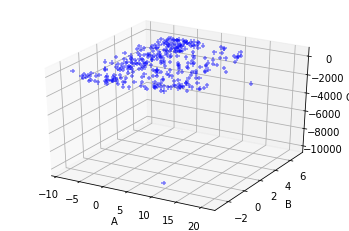

In [7]:
x_surf, y_surf = np.meshgrid(np.linspace(df.A.min(), df.A.max(), 100),np.linspace(df.B.min(), df.B.max(), 100))
onlyX = pd.DataFrame({'A': x_surf.ravel(), 'B': y_surf.ravel()})

# Visualize the Data for Multiple Linear Regression

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['A'],df['B'],df['C'],c='blue', marker='+', alpha=0.5)
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')
plt.show()